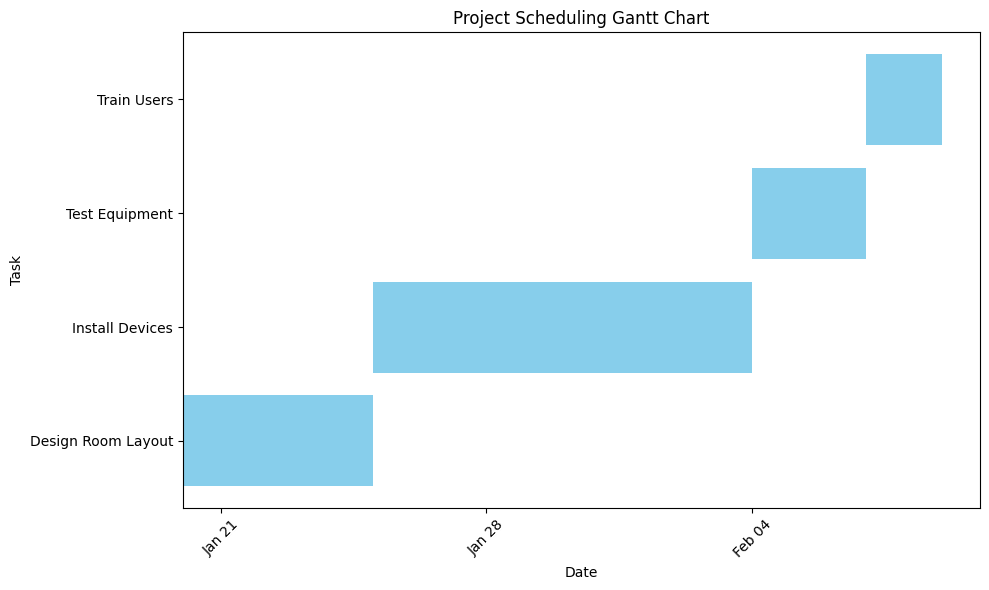

                 Task Start Date   End Date
0  Design Room Layout 2025-01-20 2025-01-25
1     Install Devices 2025-01-25 2025-02-04
2      Test Equipment 2025-02-04 2025-02-07
3         Train Users 2025-02-07 2025-02-09


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta

# Define the tasks and their durations, dependencies
tasks = {
    'Task': ['Design Room Layout', 'Install Devices', 'Test Equipment', 'Train Users'],
    'Duration (days)': [5, 10, 3, 2],
    'Dependencies': [None, 'Design Room Layout', 'Install Devices', 'Test Equipment'],
}

# Convert tasks to a DataFrame
df = pd.DataFrame(tasks)

# Define the project start date
start_date = pd.to_datetime('2025-01-20')

# Calculate the start date for each task
df['Start Date'] = pd.NaT
df['End Date'] = pd.NaT

# Apply the start and end dates based on dependencies
for i, task in df.iterrows():
    if task['Dependencies'] is None:
        df.at[i, 'Start Date'] = start_date
    else:
        # Find the task that this task depends on and set its end date as the start for this task
        dep_task = df[df['Task'] == task['Dependencies']].iloc[0]
        df.at[i, 'Start Date'] = dep_task['End Date']

    # Calculate the end date
    df.at[i, 'End Date'] = df.at[i, 'Start Date'] + timedelta(days=task['Duration (days)'])

# Plot the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot for each task
for i, task in df.iterrows():
    ax.barh(task['Task'], task['Duration (days)'], left=task['Start Date'], color='skyblue')

# Format the date on the x-axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Task')
plt.title('Project Scheduling Gantt Chart')

# Display the Gantt chart
plt.tight_layout()
plt.show()

# Print the project schedule with dates
print(df[['Task', 'Start Date', 'End Date']])
